In [1]:
import numpy as np
from utils import total_variation, get_stationary_distribution
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
n_transition_steps = int(1e5)
chains = {
    'ring': {},
    'binary_tree': {},
    'grid': {}
}

In [3]:
def calculate_total_variations(
    transition_matrix,
    initial_state_distribution,
    n_transition_steps,
    stationary_distribution,
):
    transition_steps = np.arange(n_transition_steps)
    variations = []
    initial_state_distribution = np.reshape(initial_state_distribution, (1, -1))
    current_state_distribution = initial_state_distribution
    for _ in tqdm(transition_steps):
        current_variation = total_variation(current_state_distribution,
                                            stationary_distribution)
        current_state_distribution = current_state_distribution @ transition_matrix
        variations.append(current_variation)
    return transition_steps, variations

# Ring

In [4]:
def get_lazy_ring_random_walk(n, p):
    p_prime = (1-p)/2
    P = p*np.eye(n)
    P[0, 1] = p_prime
    P[0, -1] = p_prime
    for i in range(1, n-1):
        P[i, i-1] = p_prime
        P[i, i+1] = p_prime
    P[-1, -2] = p_prime
    P[-1, 0] = p_prime
    return P

In [5]:
chains['ring']['n'] = 125
chains['ring']['p'] = 0.5
chains['ring']['marker'] = 'o'
chains['ring']['transition_matrix'] = get_lazy_ring_random_walk(chains['ring']['n'],
                                                                chains['ring']['p'])
chains['ring']['initial_state_distribution'] = np.zeros(chains['ring']['n'])
chains['ring']['initial_state_distribution'][0] = 1
(chains['ring']['stationary_distribution'],
 _, _, _) = get_stationary_distribution(chains['ring']['transition_matrix'])
chains['ring']['stationary_distribution'] = chains['ring']['stationary_distribution'].reshape((1, -1))
chains['ring']['label'] = 'Ring'

In [6]:
chains['ring']['transition_matrix']

array([[0.5 , 0.25, 0.  , ..., 0.  , 0.  , 0.25],
       [0.25, 0.5 , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.5 , 0.25],
       [0.25, 0.  , 0.  , ..., 0.  , 0.25, 0.5 ]])

In [7]:
1/chains['ring']['n']

0.008

In [8]:
chains['ring']['stationary_distribution']

array([[0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
        0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008]])

# Binary Tree

In [9]:
def get_lazy_binary_tree_walk(n, p):
    P = p*np.eye(n)
    # Root of the tree
    P[0,:3] = [p, (1-p)/2, (1-p)/2]
    n_levels = np.log2(n+1)
    non_leaf_nodes_p = (1-p)/3
    for i in range(1, int(2**(n_levels-1))-1):
        upper_state_idx = int(np.floor((i-1)/2))
        right_lower_state_idx = 2*(i+1)
        left_lower_state_idx = right_lower_state_idx - 1
        connected_states = [upper_state_idx, left_lower_state_idx, right_lower_state_idx]
        P[i, connected_states] = non_leaf_nodes_p
    # Leaf nodes
    for i in range(int(2**(n_levels-1))-1, n):
        upper_state_idx = int(np.floor((i-1)/2))
        P[i, upper_state_idx] = 1-p
    return P

In [10]:
chains['binary_tree']['n'] = 127
chains['binary_tree']['p'] = 0.5
chains['binary_tree']['marker'] = '^'
chains['binary_tree']['transition_matrix'] = get_lazy_binary_tree_walk(chains['binary_tree']['n'],
                                                                        chains['binary_tree']['p'])
chains['binary_tree']['initial_state_distribution'] = np.zeros(chains['binary_tree']['n'])
chains['binary_tree']['initial_state_distribution'][0] = 1
(chains['binary_tree']['stationary_distribution'],
 _, _, _) = get_stationary_distribution(chains['binary_tree']['transition_matrix'])
chains['binary_tree']['stationary_distribution'] = chains['binary_tree']['stationary_distribution'].reshape((1, -1))
chains['binary_tree']['label'] = 'Binary Tree'

In [11]:
chains['binary_tree']['transition_matrix']

array([[0.5       , 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ]])

In [12]:
chains['binary_tree']['stationary_distribution']

array([[0.00793651, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.01190476, 0.01190476,
        0.01190476, 0.01190476, 0.01190476, 0.00396825, 0.00396825,
        0.00396825, 0.00396825, 0.00396825, 0.00396825, 0.00396825,
        0.00396825, 0.00396825, 0.00396825, 0.00

# Grid

In [13]:
def get_state_from_grid_mapping(i, j, grid_size):
    return i*grid_size + j

def get_grid_mapping_from_state(state, grid_size):
    i = int(np.floor(state/grid_size))
    j = state - i*grid_size
    return i, j

def get_lazy_grid_random_walk(n, p):
    grid_size = int(np.sqrt(n))
    P = p*np.eye(n)
    for state in range(n):
        i, j = get_grid_mapping_from_state(state, grid_size)
        connected_states = []
        if i > 0:
            connected_states.append(get_state_from_grid_mapping(i-1, j, grid_size))
        if i < grid_size - 1:
            connected_states.append(get_state_from_grid_mapping(i+1, j, grid_size))
        if j > 0:
            connected_states.append(get_state_from_grid_mapping(i, j-1, grid_size))
        if j < grid_size - 1:
            connected_states.append(get_state_from_grid_mapping(i, j+1, grid_size))
        P[state, connected_states] = (1-p)/len(connected_states)
    return P

In [14]:
chains['grid']['n'] = 121
chains['grid']['p'] = 0.5
chains['grid']['marker'] = 'v'
chains['grid']['transition_matrix'] = get_lazy_grid_random_walk(chains['grid']['n'],
                                                                chains['grid']['p'])
chains['grid']['initial_state_distribution'] = np.zeros(chains['grid']['n'])
chains['grid']['initial_state_distribution'][0] = 1
(chains['grid']['stationary_distribution'],
 _, _, _) = get_stationary_distribution(chains['grid']['transition_matrix'])
chains['grid']['stationary_distribution'] = chains['grid']['stationary_distribution'].reshape((1, -1))
chains['grid']['label'] = '2D Grid'

In [15]:
chains['grid']['transition_matrix']

array([[0.5       , 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.5       , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.16666667,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.5       ,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.5       ]])

In [16]:
chains['grid']['stationary_distribution']

array([[0.00454545, 0.00681818, 0.00681818, 0.00681818, 0.00681818,
        0.00681818, 0.00681818, 0.00681818, 0.00681818, 0.00681818,
        0.00454545, 0.00681818, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00681818, 0.00681818, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00681818, 0.00681818, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00681818, 0.00681818,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00681818,
        0.00681818, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
        0.00681818, 0.00681818, 0.00909091, 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.00909091, 0.00

# Markov metrics

In [17]:
for chain_name in chains.keys():
    print(f'Calculating total variations for {chain_name} chain')
    (chains[chain_name]['transition_steps'],
     chains[chain_name]['variations']) = calculate_total_variations(
        transition_matrix=chains[chain_name]['transition_matrix'],
        initial_state_distribution=chains[chain_name]['initial_state_distribution'],
        n_transition_steps=n_transition_steps,
        stationary_distribution=chains[chain_name]['stationary_distribution'],
    )

Calculating total variations for ring chain


100%|██████████| 100000/100000 [00:00<00:00, 191104.58it/s]


Calculating total variations for binary_tree chain


100%|██████████| 100000/100000 [00:00<00:00, 200677.20it/s]


Calculating total variations for grid chain


100%|██████████| 100000/100000 [00:00<00:00, 229099.54it/s]


## Stationary distribution

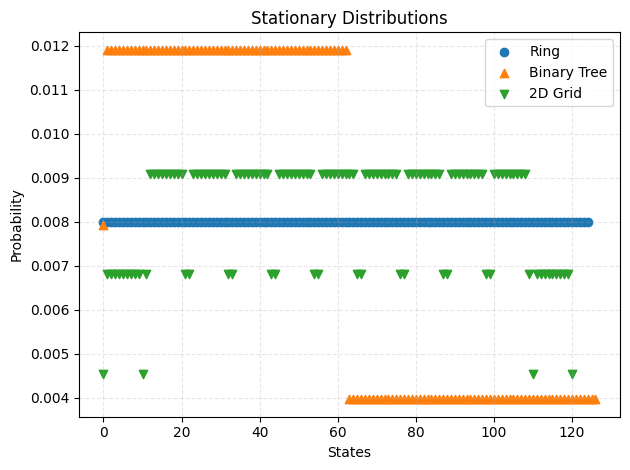

In [21]:
fig, ax = plt.subplots()
ax.set(
    xlabel='States',
    ylabel='Probability',
    title='Stationary Distributions',
)
ax.grid(linestyle='--', alpha=.3)
ax.grid(linestyle='--', alpha=.3)
for chain_name, chain in chains.items():
    ax.scatter(
        np.arange(chain['n']),
        chain['stationary_distribution'].flatten(),
        label=chain['label'],
        marker=chain['marker'],)
ax.legend()
fig.tight_layout()

## Total Variation

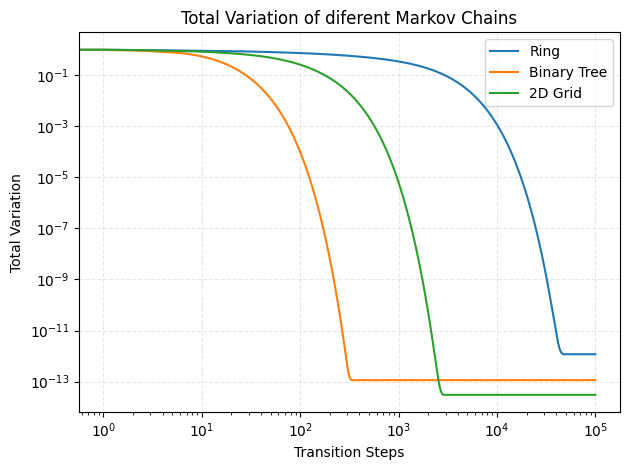

In [19]:
fig, ax = plt.subplots()
ax.set(
    xlabel='Transition Steps',
    ylabel='Total Variation',
    title='Total Variation of diferent Markov Chains',
    xscale='log',
    yscale='log',
)
ax.grid(linestyle='--', alpha=.3)
for chain_name, chain in chains.items():
    ax.plot(
        chain['transition_steps'],
        chain['variations'],
        label=chain['label'],)
ax.legend()
fig.tight_layout()